<a href="https://colab.research.google.com/github/pooja195manjunath/Machine-Learning-/blob/main/1bm22cs195_Lab8_K__means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means on Iris Dataset (Accuracy Calculation)

In [1]:
# K-means on Iris Dataset for Accuracy

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform K-means clustering (3 clusters for 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Since K-means is an unsupervised algorithm, the cluster labels don't directly match the target labels
# To calculate accuracy, we map cluster labels to actual species labels
# Here we assume that the true labels are known and compare them with the clusters' output

# We use the mode (most frequent) of the true class labels for each cluster to match them
from scipy.stats import mode
cluster_labels = np.zeros_like(y_kmeans)
for i in range(3):  # 3 clusters
    mask = (y_kmeans == i)
    cluster_labels[mask] = mode(y[mask])[0]

# Calculate accuracy by comparing the mapped cluster labels with true labels
accuracy = accuracy_score(y, cluster_labels)
print(f'K-means Clustering Accuracy on Iris Dataset: {accuracy:.4f}')


K-means Clustering Accuracy on Iris Dataset: 0.8867


## K-means on Iris Dataset (Visualization)

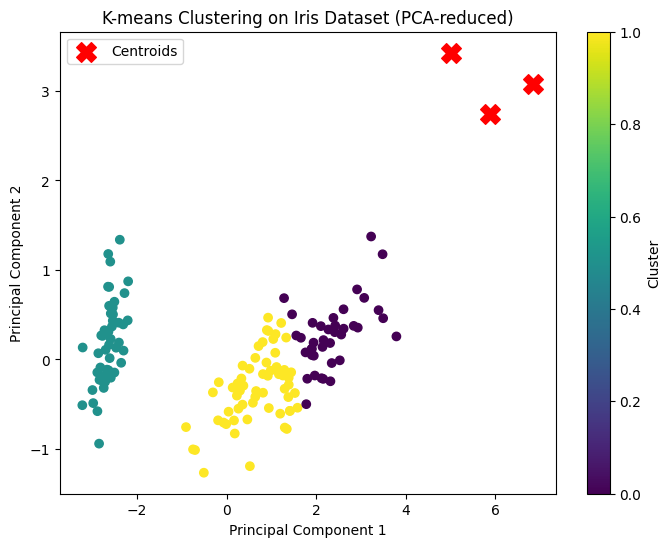

In [2]:
# K-means on Iris Dataset with Visualization

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for 2D visualization (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-means clustering (3 clusters for 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clustering result in 2D (PCA-reduced space)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


##  K-means on a Kaggle Dataset (Visualization)

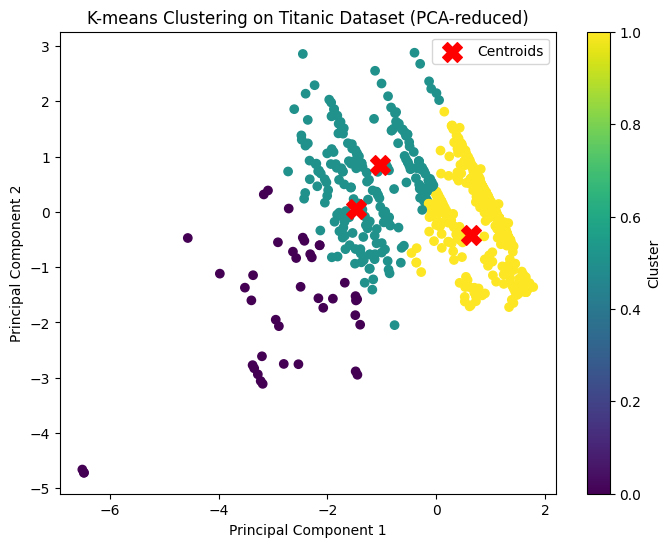

In [3]:
# K-means on Kaggle Titanic Dataset with Visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Titanic dataset (You can replace the URL with your own Kaggle dataset link)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing: Selecting relevant features and dropping missing values
data = data.dropna(subset=['Pclass', 'Age', 'Fare'])
X = data[['Pclass', 'Age', 'Fare']]

# Normalize the data (optional, but helps with clustering)
X = (X - X.mean()) / X.std()

# Apply K-means clustering (let's assume we use 3 clusters for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Apply PCA for 2D visualization (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Titanic Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()
